In [2]:
import sys
import os
sys.path.append("..")
import jax.numpy as jnp
import jax
import numpy as np
import matplotlib.pyplot as plt
from jax import grad, jit, vmap
import numpyro
from numpyro import distributions as dist
from numpyro import infer
from numpyro_ext import distributions as distx
from numpyro_ext import info, optim
numpyro.set_host_device_count(1)  # For multi-core parallelism (useful when running multiple MCMC chains in parallel)
numpyro.set_platform("cpu")  # For CPU (use "gpu" for GPU)
jax.config.update("jax_enable_x64", True)
#jax.config.update('jax_disable_jit', True)
from jaxoplanet import light_curves, orbits
from jaxoplanet.light_curves import limb_dark_light_curve
import arviz as az
import corner
from eclipsoid.light_curve import legacy_oblate_lightcurve, compute_bounds
import os
import pandas as pd
os.environ["XLA_FLAGS"] = "--xla_force_host_platform_device_count=2"
oblate_lightcurve = jit(legacy_oblate_lightcurve)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


{'period': 7.704045333151538, 't0': 1.0, 'radius': 0.1446, 'bo': 0.01, 'u': Array([0.3, 0.2], dtype=float64), 'f': 0.1, 'theta': 0.6108652381980153, 'duration': 0.12}


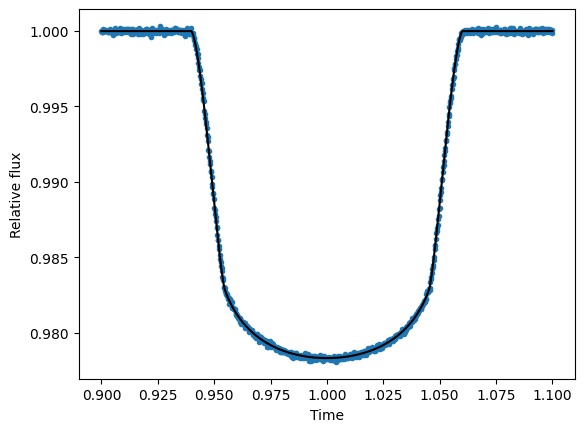

In [3]:
np.random.seed(11)
period_true = np.random.uniform(5, 20)
t = np.linspace(0.9,1.1,1000)
yerr = 100*1e-6

true_params = {'period':period_true,
               't0':1.0,
                'radius':0.1446,
                'bo':0.01,
                'u':jnp.array([0.3, 0.2]),
                'f':0.1,
                'theta':np.radians(35),
                'duration': 0.12
} 

print(true_params)

# Compute a limb-darkened light curve using starry
lc_true = oblate_lightcurve(true_params, t-true_params['t0'])

lc = lc_true + yerr*np.random.normal(size=len(t))

ax = plt.subplot()
ax.plot(t, lc, 'C0.')
ax.plot(t, lc_true, color='k')
ax.set_ylabel("Relative flux")
ax.set_xlabel("Time");